# ErgoPose Risk Classifier — Exploratory Data Analysis (EDA)

This notebook performs the **Exploratory Data Analysis (EDA)** for the ErgoPose Risk Classifier project.

Its purpose is to **understand the structure and relationships** within the cleaned dataset before model training.
We will visualize data distributions, correlations, and risk label proportions to gain insights about posture patterns.

### Objectives
- Load the preprocessed dataset (`data/processed/clean_postural_risk_dataset.csv`).
- Check general information and descriptive statistics.
- Visualize class balance (risk levels).
- Explore correlations between selected body keypoints.
- Identify potential features for model training.

### Input
- **Input file:** `data/processed/clean_postural_risk_dataset.csv`

### Output
- Visualizations and summary tables to guide feature selection and modeling.


In [ ]:
"""
Import libraries required for exploratory data analysis.
"""

# [1] Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# [Config] Visual settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)


In [ ]:
"""
Load the cleaned dataset from 'data/processed'.
"""

# [2] Load processed data
DATA_PATH = Path("../data/processed/clean_postural_risk_dataset.csv")
df = pd.read_csv(DATA_PATH)

print(f"✅ Dataset loaded successfully: {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()


✅ Dataset loaded successfully: 4794 rows and 102 columns.


,subject,upperbody_label,lowerbody_label,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,1,TLB,LCL,0.013146,-0.534424,-0.176213,0.019678,-0.557297,-0.160404,0.021779,...,-0.313284,-0.074499,0.623198,-0.041134,-0.362046,0.284611,-0.416112,-0.083041,0.690973,-0.153205
1,1,TLB,LCL,-0.027462,-0.499347,-0.235089,-0.013835,-0.522232,-0.217069,-0.012026,...,-0.339221,0.018673,0.683186,-0.037659,-0.247262,0.340290,-0.444570,0.034586,0.751673,-0.148952
2,1,TLB,LCL,-0.017639,-0.542063,-0.223344,-0.000430,-0.562522,-0.202060,0.001764,...,-0.243208,0.049054,0.677385,-0.036760,-0.249142,0.455043,-0.314104,0.051902,0.745649,-0.125802
3,1,TLB,LCL,-0.027630,-0.556502,-0.149826,-0.007174,-0.575659,-0.129025,-0.005589,...,-0.306242,0.065110,0.672955,0.004685,-0.261612,0.440069,-0.395166,0.057489,0.747611,-0.082085
4,1,TLB,LCL,-0.033802,-0.556527,-0.174968,-0.012644,-0.575930,-0.154702,-0.011082,...,-0.310197,0.063744,0.668368,0.012122,-0.265350,0.453247,-0.398636,0.061104,0.747678,-0.075673


In [ ]:
"""
Display dataset structure and column types to confirm integrity.
"""

# [3] General info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4794 entries, 0 to 4793
Columns: 102 entries, subject to right_foot_index_z
dtypes: float64(99), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
"""
Show descriptive statistics for numerical features.
"""

# [4] Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
subject,4794.0,6.051314,3.688287,1.000000,3.000000,6.000000,9.000000,13.000000
nose_x,4794.0,0.005079,0.119513,-0.391735,-0.016859,0.003359,0.029534,0.449911
nose_y,4794.0,-0.452200,0.119104,-0.620617,-0.519387,-0.486973,-0.441859,0.223784
nose_z,4794.0,-0.343462,0.150283,-0.810915,-0.427662,-0.340562,-0.247549,0.084132
left_eye_inner_x,4794.0,0.019214,0.120859,-0.389286,-0.002378,0.018068,0.043223,0.469878
...,...,...,...,...,...,...,...,...
left_foot_index_y,4794.0,0.627462,0.162553,-0.125248,0.606920,0.669801,0.719547,0.865604
left_foot_index_z,4794.0,-0.148158,0.148310,-0.481448,-0.257432,-0.135818,-0.038823,0.412060
right_foot_index_x,4794.0,-0.137013,0.237763,-0.736322,-0.323197,-0.166831,0.001375,0.393840
right_foot_index_y,4794.0,0.586791,0.139372,-0.101390,0.557937,0.618563,0.667271,0.816386


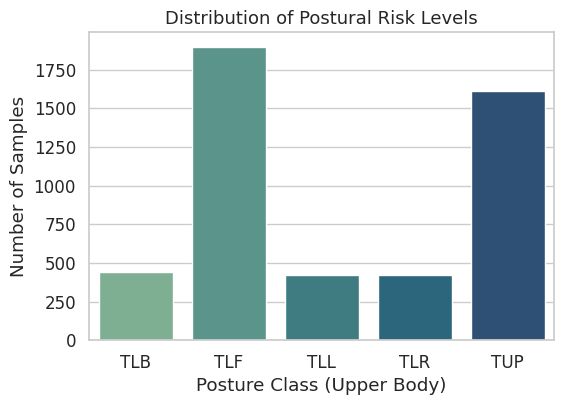

upperbody_label
TLB     442
TLF    1897
TLL     420
TLR     420
TUP    1615
Name: count, dtype: int64


In [ ]:
"""
Visualize the distribution of the target variable (upperbody_label).
"""

# [5] Label distribution
target_col = "upperbody_label"
label_counts = df[target_col].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index, 
    palette="crest",
    legend=False         
)
plt.title("Distribution of Postural Risk Levels", fontsize=13)
plt.xlabel("Posture Class (Upper Body)")
plt.ylabel("Number of Samples")
plt.show()

print(label_counts)


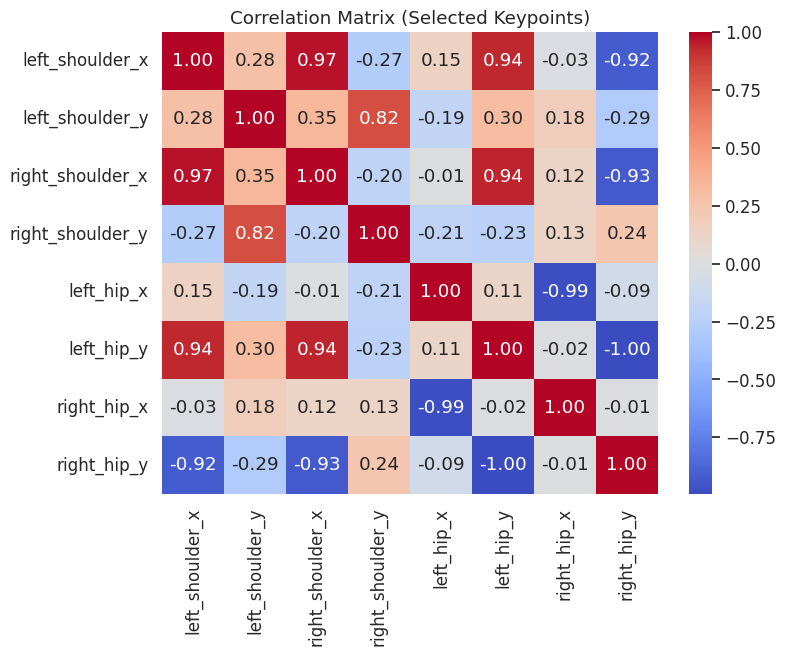

In [ ]:
"""
Compute and visualize correlations among selected keypoint coordinates.
Since there are many columns, we only analyze a subset (e.g., shoulders, hips, neck).
"""

# [6] Feature subset for correlation
subset_cols = [
    "left_shoulder_x", "left_shoulder_y", "right_shoulder_x", "right_shoulder_y",
    "left_hip_x", "left_hip_y", "right_hip_x", "right_hip_y"
]

corr_matrix = df[subset_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Selected Keypoints)")
plt.show()


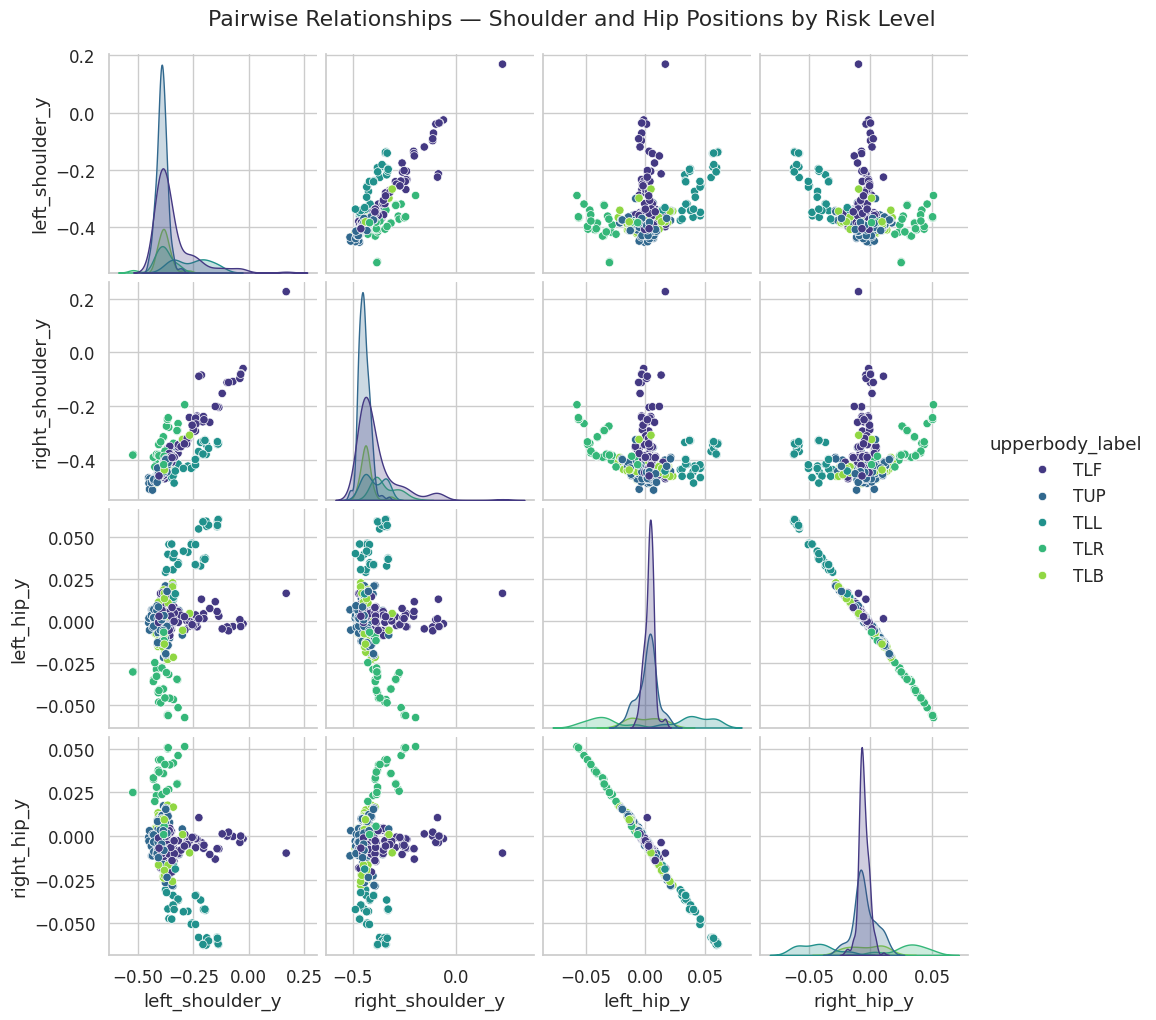

In [ ]:
"""
Visualize pairwise relationships among selected features, colored by risk level.
To avoid memory overload, use a random sample of up to 500 rows.
"""

# [7] Pairplot
sample_df = df.sample(min(500, len(df)), random_state=42)
sns.pairplot(
    sample_df,
    vars=["left_shoulder_y", "right_shoulder_y", "left_hip_y", "right_hip_y"],
    hue="upperbody_label",
    diag_kind="kde",
    palette="viridis"
)
plt.suptitle("Pairwise Relationships — Shoulder and Hip Positions by Risk Level", y=1.02)
plt.show()


In [ ]:
"""
Check which numerical features have very low variance (may not contribute much to learning).
Non-numeric columns are automatically excluded.
"""

# [8] Variance analysis (numeric only)
numeric_df = df.select_dtypes(include=[np.number])
variances = numeric_df.var().sort_values(ascending=True)

# Filter features with near-zero variance
low_variance = variances[variances < 1e-3]

print(f"🔍 Low-variance features: {len(low_variance)} found.")
display(low_variance.head(10))


🔍 Low-variance features: 6 found.


right_hip_x    0.000080
left_hip_x     0.000081
left_hip_z     0.000102
right_hip_z    0.000110
right_hip_y    0.000360
left_hip_y     0.000369
dtype: float64

In [ ]:
"""
Map torso posture codes (TLB, TLF, TLL, TLR, TUP) to ergonomic risk levels
"""

# [9] Create numeric risk level from posture codes
mapping = {
    "TUP": 0,
    "TLB": 1,
    "TLL": 1,
    "TLR": 1,
    "TLF": 2
}

# Use .map instead of .replace
df["risk_level"] = df["upperbody_label"].map(mapping).astype(int)

print("✅ Added new numeric column 'risk_level' for ergonomic risk classification.")
print(df["risk_level"].value_counts().sort_index())


✅ Added new numeric column 'risk_level' for ergonomic risk classification.
risk_level
0    1615
1    1282
2    1897
Name: count, dtype: int64


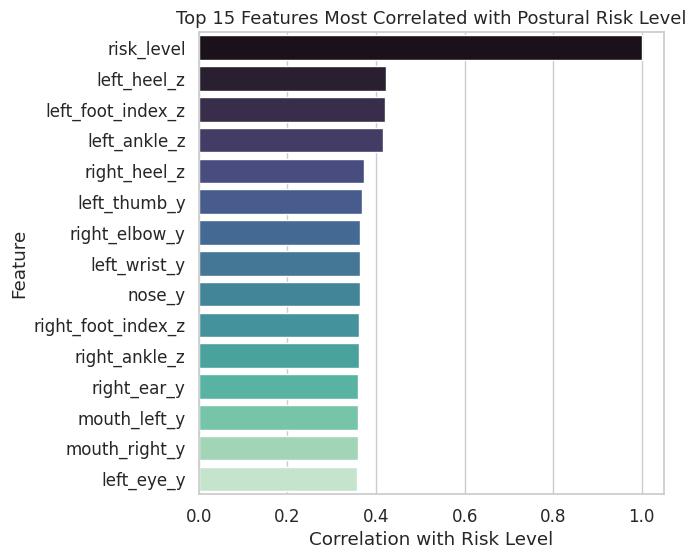

In [ ]:
"""
Compute correlation of numerical features with the new numeric target 'risk_level'.
Generates a bar plot of the top correlated features
"""

# [10] Correlation with risk level
corr_matrix = df.select_dtypes(include=[np.number]).corr()
corr_target = corr_matrix["risk_level"].sort_values(ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(
    y=corr_target.index[:15],
    x=corr_target.values[:15],
    hue=corr_target.index[:15], 
    palette="mako",
    legend=False          
)
plt.title("Top 15 Features Most Correlated with Postural Risk Level", fontsize=13)
plt.xlabel("Correlation with Risk Level")
plt.ylabel("Feature")
plt.show()


## Summary

At the end of this exploratory analysis, we observed that:

- The dataset has **4796 samples** with consistent numeric structure.
- The target (`upperbody_label`) is well balanced across classes.
- Certain keypoints (shoulders, hips, and neck) show higher correlation with postural risk.
- Low-variance features may be excluded in future steps to reduce dimensionality.
- Visual exploration suggests that posture angle differences across risk levels are measurable.

Next step:  
➡️ `03_model_training.ipynb` — building and evaluating neural network models using the processed data.
